In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data_order = pd.read_parquet(r'C:\Users\leand\Desktop\Data Science (Henry)\Proyectos\Proyecto_grupal\DS-Proyecto_Grupal_Olist\data_parquet\data_orderP')

In [3]:
data_order.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13


In [4]:
data_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [5]:
data_order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

### ***PRIMERO HABRÍA QUE CORREGIR LOS REGISTROS DONDE LAS FECHAS SON INCONSISTENTES, Y DESPUÉS YA SÍ PASAR A LA IMPUTACIÓN DE FALTANTES***

In [6]:
'Comprobamos que no haya registros con fecha de aprobación anterior a la fecha de compra del producto'

data_order[data_order['order_approved_at'] < data_order['order_purchase_timestamp']]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [7]:
'NO PUEDE SERRRR'

(data_order['order_approved_at'] - data_order['order_purchase_timestamp']).max()

Timedelta('187 days 21:10:50')

In [8]:
'yo lo borraría a la concha de la lora. Mauro también. Y Juan ahora también'

data_order[data_order.index == 47552]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
47552,1612081119e8f23745698ad3367cc14b,20d32833d8983a835cafcd54099631a0,unavailable,2016-10-05 18:06:48,2017-04-11 15:17:38,NaT,NaT,2016-11-17


In [9]:
data_order.drop([47552], inplace= True)

In [10]:
(data_order['order_approved_at'] - data_order['order_purchase_timestamp']).sort_values(ascending= False)

62293   60 days 10:51:59
4541    32 days 16:02:44
4396    32 days 13:01:41
43697   32 days 12:51:18
96251   30 days 21:26:37
              ...       
97696                NaT
98415                NaT
98909                NaT
99283                NaT
99347                NaT
Length: 99440, dtype: timedelta64[ns]

*La mayoría de los registros con varios días de diferencia tienen información valiosa, por eso no es recomendable eliminarlos. Muchas son ventas que no se terminaron concretando, dato que nos sirve para un de nuestros KPI*

In [12]:
diferencia_compra_aprobacion = data_order['order_approved_at'] - data_order['order_purchase_timestamp']

In [13]:
diferencia_compra_aprobacion.dt.days

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
99436    0.0
99437    0.0
99438    0.0
99439    0.0
99440    0.0
Length: 99440, dtype: float64

In [14]:
diferencia_compra_aprobacion.dt.days.describe()

count    99280.000000
mean         0.267919
std          0.788281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         60.000000
dtype: float64

<AxesSubplot:>

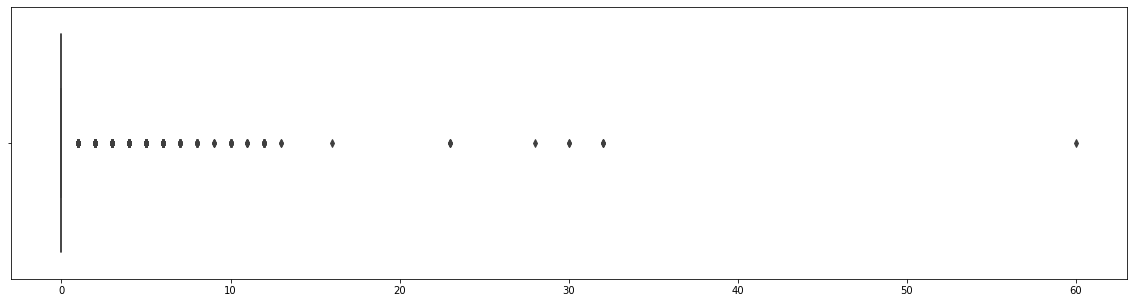

In [15]:
plt.figure(figsize=(20,5))
sns.boxplot(x = diferencia_compra_aprobacion.dt.days)

#### Diferencia entre que una orden es aprobada y enviada

In [16]:
'ESTÁ MAAAAAL'

(data_order['order_delivered_carrier_date'] - data_order['order_approved_at']).min()

Timedelta('-172 days +18:44:38')

In [18]:
diferencia_aprobacion_envio = data_order['order_delivered_carrier_date'] - data_order['order_approved_at']

In [21]:
diferencia_aprobacion_envio.max()

Timedelta('125 days 18:18:06')

In [22]:
data_order[data_order.index == 36305]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
36305,da81fbc27b55e0f3d2813cf2078dc780,9cb739dc712ebd193e4eb94f3aeb8d20,delivered,2017-11-14 21:07:55,2017-11-14 21:26:34,2018-03-20 15:44:40,2018-03-21 00:18:54,2017-12-11


In [23]:
diferencia_aprobacion_envio.sort_values(ascending= False)

36305   125 days 18:18:06
35213   107 days 01:16:38
3077    101 days 08:40:15
44200    64 days 13:41:06
71854    62 days 14:13:29
               ...       
99283                 NaT
99313                 NaT
99347                 NaT
99348                 NaT
99415                 NaT
Length: 99440, dtype: timedelta64[ns]

<AxesSubplot:>

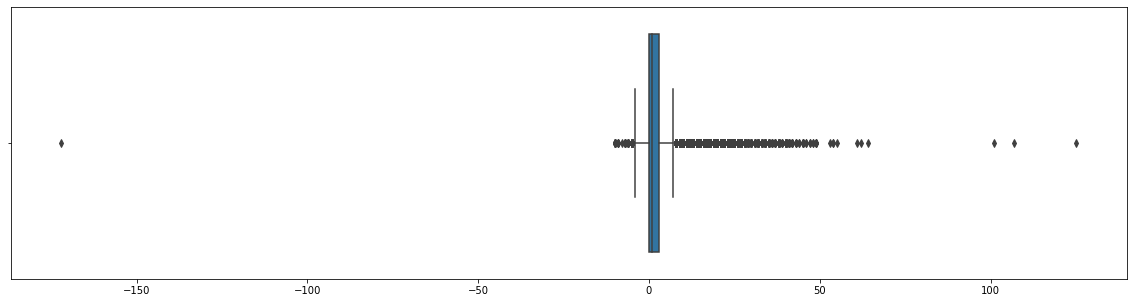

In [24]:
plt.figure(figsize=(20,5))
sns.boxplot(x = diferencia_aprobacion_envio.dt.days)

In [25]:
(diferencia_aprobacion_envio.dt.days < 0).sum()

1359

In [40]:
data_order[diferencia_aprobacion_envio.dt.days < 0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
15,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04
64,688052146432ef8253587b930b01a06d,81e08b08e5ed4472008030d70327c71f,delivered,2018-04-22 08:48:13,2018-04-24 18:25:22,2018-04-23 19:19:14,2018-04-24 19:31:58,2018-05-15
199,58d4c4747ee059eeeb865b349b41f53a,1755fad7863475346bc6c3773fe055d3,delivered,2018-07-21 12:49:32,2018-07-26 23:31:53,2018-07-24 12:57:00,2018-07-25 23:58:19,2018-07-31
210,412fccb2b44a99b36714bca3fef8ad7b,c6865c523687cb3f235aa599afef1710,delivered,2018-07-22 22:30:05,2018-07-23 12:31:53,2018-07-23 12:24:00,2018-07-24 19:26:42,2018-07-31
415,56a4ac10a4a8f2ba7693523bb439eede,78438ba6ace7d2cb023dbbc81b083562,delivered,2018-07-22 13:04:47,2018-07-27 23:31:09,2018-07-24 14:03:00,2018-07-28 00:05:39,2018-08-06
...,...,...,...,...,...,...,...,...
99091,240ead1a7284667e0ec71d01f80e4d5e,fcdd7556401aaa1c980f8b67a69f95dc,delivered,2018-07-02 16:30:02,2018-07-05 16:17:59,2018-07-05 14:11:00,2018-07-10 23:21:47,2018-07-24
99230,78008d03bd8ef7fcf1568728b316553c,043e3254e68daf7256bda1c9c03c2286,delivered,2018-07-03 13:11:13,2018-07-05 16:32:52,2018-07-03 12:57:00,2018-07-10 17:47:39,2018-07-23
99266,76a948cd55bf22799753720d4545dd2d,3f20a07b28aa252d0502fe7f7eb030a9,delivered,2018-01-30 02:41:30,2018-02-04 23:31:46,2018-01-31 18:11:58,2018-03-18 20:08:50,2018-03-02
99377,a6bd1f93b7ff72cc348ca07f38ec4bee,6d63fa86bd2f62908ad328325799152f,delivered,2018-04-20 17:28:40,2018-04-24 19:26:10,2018-04-23 17:18:40,2018-04-28 17:38:42,2018-05-15


#### TRATAMIENTO DE VALORES QUE ESTÁN MAL EN LA FECHA DE APROBACIÓN RESPECTO A LA FECHA DE COMPRA

In [26]:
Q1 = diferencia_compra_aprobacion.dt.days.quantile(0.25) 
Q3 = diferencia_compra_aprobacion.dt.days.quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out = (diferencia_compra_aprobacion.dt.days<BI) | (diferencia_compra_aprobacion.dt.days>BS)

In [27]:
diferencia_compra_aprobacion.dt.days

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
99436    0.0
99437    0.0
99438    0.0
99439    0.0
99440    0.0
Length: 99440, dtype: float64

In [28]:
out.sum()

17419

In [29]:
diferencia_compra_aprobacion[~out]

0       0 days 00:10:42
2       0 days 00:16:34
3       0 days 00:17:53
4       0 days 01:01:50
5       0 days 00:13:08
              ...      
99436   0 days 00:00:00
99437   0 days 00:11:39
99438   0 days 00:17:33
99439   0 days 00:07:54
99440   0 days 14:22:58
Length: 82021, dtype: timedelta64[ns]

In [30]:
'Calculamos el promedio SIN LOS OUTLIERS para que no se distorsione la métrica. ESTO ES CLAVEEEE :). Antes daba 10 horitas'

promedio_demora_aprobacion = diferencia_compra_aprobacion[~out].mean()

In [31]:
promedio_demora_aprobacion

Timedelta('0 days 02:48:30.204700651')

In [41]:
'Procedemos a imputar donde hay incosistencia entre fecha de aprobación y fecha de salida del producto'


data_order.loc[diferencia_aprobacion_envio.dt.days < 0, 'order_approved_at'] = data_order.order_purchase_timestamp + pd.Timedelta(promedio_demora_aprobacion) 

In [42]:
'chequeamos que el método magistral haya dado sus frutos. ah ponia frutos'

data_order[data_order.index == 15]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
15,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-07 21:51:42.204700651,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04


In [43]:
diferencia_aprobacion_envio_2 = data_order['order_delivered_carrier_date'] - data_order['order_approved_at']

<AxesSubplot:>

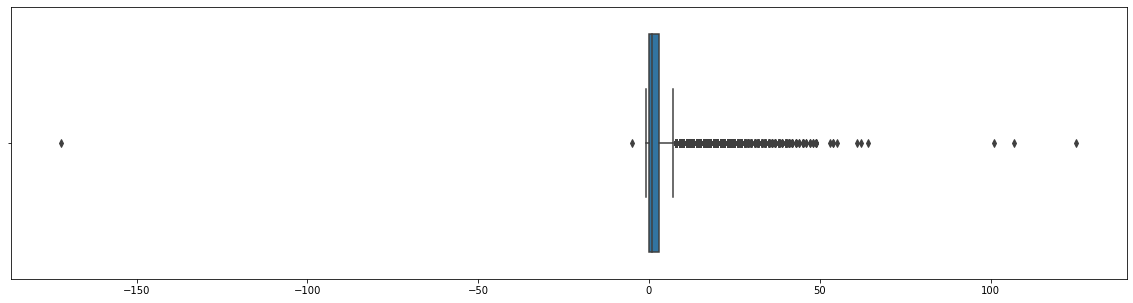

In [44]:
plt.figure(figsize=(20,5))
sns.boxplot(x = diferencia_aprobacion_envio_2.dt.days)

Podemos ver que todavía quedaron algunos mal, eso es porque están mal los valores de los otros campos de fecha

In [180]:
'Antes eran 1359'

(diferencia_aprobacion_envio_2.dt.days < 0).sum()

273

In [182]:
'Observamos que el error sigue estando porque hay compras en que la fecha de salida es anterior a la misma compra'

data_order[diferencia_aprobacion_envio_2.dt.days < 0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
615,b9afddbdcfadc9a87b41a83271c3e888,85c6af75161b8b2b1af98e82b5a6a5a5,delivered,2018-08-16 13:50:48,2018-08-16 16:39:18.204700651,2018-08-16 13:27:00,2018-08-24 14:58:37,2018-09-04
1031,95fa26b6ea476ed040e592e0a825d6f0,9aad6db5643769b3d802a87328ec31e2,delivered,2018-06-06 13:48:42,2018-06-06 16:37:12.204700651,2018-06-06 14:02:00,2018-06-11 16:55:40,2018-07-12
1111,ad133696906f6a78826daa0911b7daec,e6f5b234bb0d847f10eebd70130c5d49,delivered,2018-06-15 15:41:22,2018-06-15 18:29:52.204700651,2018-06-15 14:52:00,2018-06-22 18:09:37,2018-07-18
1329,74e033208dc13a7b8127eb8e73d09b76,72fcbb1145f2889eddcba6d6c1d6c090,delivered,2018-05-02 10:48:44,2018-05-02 13:37:14.204700651,2018-05-02 09:49:00,2018-05-07 23:06:36,2018-05-29
1372,a6b58794fd2ba533359a76c08df576e3,ccd8e3459ad58ae538c9d2cf35532ba4,delivered,2018-05-14 15:18:23,2018-05-14 18:06:53.204700651,2018-05-14 13:46:00,2018-05-19 19:33:32,2018-06-08
...,...,...,...,...,...,...,...,...
98672,5ded8a3706eabd813685534724f066de,460316e38d4d241fc79d4f6729f8f7f6,delivered,2018-07-18 08:46:52,2018-07-18 11:35:22.204700651,2018-07-18 08:44:00,2018-07-25 13:53:17,2018-08-10
98780,d10046876c7d9f01613da59ffa6cb07f,6559cb5b365f173915f766fefcd86972,delivered,2018-07-18 16:14:16,2018-07-18 19:02:46.204700651,2018-07-18 15:34:00,2018-07-23 20:46:44,2018-08-07
98815,810b8bba6a2fb6419db87fe22a4299fe,831bc4457a38cb2e1bd53a4f015a0528,delivered,2018-05-10 11:54:32,2018-05-10 14:43:02.204700651,2018-05-10 12:18:00,2018-05-15 19:54:56,2018-05-29
98968,bf0e0772c9e81651f6f0f255ed74bf88,ba796cfb1a430e5d6ceed83cde80ff92,delivered,2018-05-29 13:46:56,2018-05-29 16:35:26.204700651,2018-05-29 14:09:00,2018-06-12 12:56:44,2018-07-11


Hay que seguir tratando estos valores. Vamos a corregirlos poniendo el promedio de demora entre que una compra es aprobada y sale el flete

In [45]:
Q1 = diferencia_aprobacion_envio_2.dt.days.quantile(0.25) 
Q3 = diferencia_aprobacion_envio_2.dt.days.quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out = (diferencia_aprobacion_envio_2.dt.days<BI) | (diferencia_aprobacion_envio_2.dt.days>BS)

In [46]:
out.sum()

5029

In [47]:
data_order[out]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28
23,95266dbfb7e20354baba07964dac78d5,a166da34890074091a942054b36e4265,delivered,2018-01-08 07:55:29,2018-01-08 08:07:31,2018-01-24 23:16:37,2018-01-26 17:32:38,2018-02-21
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21
58,a685d016c8a26f71a0bb67821070e398,911e4c37f5cafe1604fe6767034bf1ae,delivered,2017-03-13 18:14:36,2017-03-13 18:14:36,2017-03-22 14:03:09,2017-04-06 13:37:16,2017-03-30
...,...,...,...,...,...,...,...,...
99322,e0cb1558bbe670b4cd84bf99bf93318f,956d144703c3b72fcb05e587e39f3ab2,delivered,2018-01-12 17:02:11,2018-01-12 17:13:24,2018-01-24 13:06:49,2018-02-02 16:08:40,2018-02-20
99337,5dea57306e01caa42ad0b07b85042953,0b3a3c105d2d5b981fcf34c111fb18a4,delivered,2018-07-16 01:31:13,2018-07-16 01:47:22,2018-07-26 11:05:00,2018-08-02 19:42:02,2018-08-14
99389,83db27f85506380229913b0dfdf5cd18,472acc24324ad4cee482fe4ef5910dc1,delivered,2018-04-18 12:35:58,2018-04-19 02:51:26,2018-05-02 08:52:00,2018-05-07 16:40:55,2018-05-29
99396,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16


In [48]:
'Calculamos el promedio SIN LOS OUTLIERS para que no se distorsione la métrica'


promedio_demora_salida = diferencia_aprobacion_envio_2[~out].mean()

In [49]:
promedio_demora_salida

Timedelta('2 days 05:44:34.240298236')

In [50]:
'Procedemos a imputar donde hay incosistencia entre fecha de aprobación y fecha de salida del producto'


data_order.loc[diferencia_aprobacion_envio_2.dt.days < 0, 'order_delivered_carrier_date'] = data_order.order_approved_at + pd.Timedelta(promedio_demora_salida) 

In [51]:
'chequeamos que el método magistral haya dado sus frutos. ah ponia frutos'

data_order[data_order.index == 615]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
615,b9afddbdcfadc9a87b41a83271c3e888,85c6af75161b8b2b1af98e82b5a6a5a5,delivered,2018-08-16 13:50:48,2018-08-16 16:39:18.204700651,2018-08-18 22:23:52.444998887,2018-08-24 14:58:37,2018-09-04


In [58]:
'Ya funciona a pleno'

diferencia_aprobacion_envio_3 = data_order['order_delivered_carrier_date'] - data_order['order_approved_at']
(diferencia_aprobacion_envio_3.dt.days < 0).sum()

0

#### TRATAMIENTO DE VALORES QUE ESTÁN MAL EN LA FECHA DE LLEGADA DEL PRODUCTO RESPECTO A LA FECHA DE SALIDA

In [62]:
data_order[data_order.order_delivered_carrier_date > data_order.order_delivered_customer_date].shape

(53, 8)

In [64]:
data_order[data_order.order_delivered_carrier_date > data_order.order_delivered_customer_date].head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3011,b777b7d618ee48ec7cf64aeb188e9da5,2b83d4c1da04d92aceb19710d0a59ef9,delivered,2018-08-09 11:47:22,2018-08-09 14:35:52.204700651,2018-08-11 20:20:26.444998887,2018-08-10 15:41:50,2018-08-15
4114,08adcddad19d3acf37d1fa01cb9ded1e,94c2f45091985c47b4c4fb301113f0a4,delivered,2018-06-27 11:16:44,2018-06-27 14:05:14.204700651,2018-06-29 19:49:48.444998887,2018-06-29 17:39:53,2018-07-18
4660,d454d6650d375ebc3f9667a4d2fe161c,7ae2a9337aa4bc799723511faa1d6830,delivered,2018-05-10 09:12:16,2018-05-10 12:00:46.204700651,2018-05-12 17:45:20.444998887,2018-05-11 18:58:28,2018-05-23


In [65]:
diferencia_salida_llegada = data_order['order_delivered_customer_date'] - data_order['order_delivered_carrier_date']

In [67]:
(diferencia_salida_llegada.dt.days < 0).sum()

53

<AxesSubplot:>

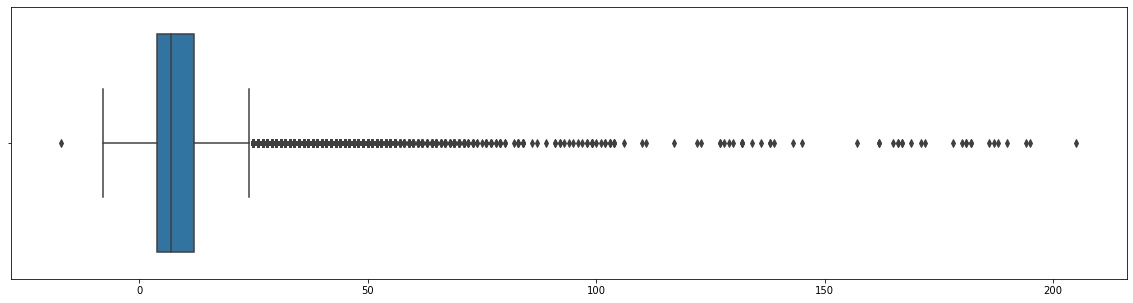

In [69]:
plt.figure(figsize=(20,5))
sns.boxplot(x = diferencia_salida_llegada.dt.days)

In [72]:
Q1 = diferencia_salida_llegada.dt.days.quantile(0.25) 
Q3 = diferencia_salida_llegada.dt.days.quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR
out = (diferencia_salida_llegada.dt.days<BI) | (diferencia_salida_llegada.dt.days>BS)

In [75]:
out.sum()

4551

In [78]:
'Calculamos promedio sin outliers'

promedio_demora_llegada = diferencia_salida_llegada[~out].mean()
promedio_demora_llegada

Timedelta('7 days 23:34:08.253344124')

In [79]:
'Procedemos a imputar donde hay incosistencia entre fecha de salida del producto y fecha de llegada'


data_order.loc[diferencia_salida_llegada.dt.days < 0, 'order_delivered_customer_date'] = data_order.order_delivered_carrier_date + pd.Timedelta(promedio_demora_llegada) 

In [82]:
'Corroboramos'

data_order[data_order.index == 3011]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3011,b777b7d618ee48ec7cf64aeb188e9da5,2b83d4c1da04d92aceb19710d0a59ef9,delivered,2018-08-09 11:47:22,2018-08-09 14:35:52.204700651,2018-08-11 20:20:26.444998887,2018-08-19 19:54:34.698343011,2018-08-15


In [83]:
'Probamos que no haya más incosistencias luego de la imputación'

diferencia_salida_llegada_2 = data_order['order_delivered_customer_date'] - data_order['order_delivered_carrier_date']

In [87]:
(diferencia_salida_llegada_2.dt.days < 0).sum()

0

### **Verificamos que no haya registros con fecha estimada de llegada anterior a la fecha de compra**

In [89]:

data_order[data_order.order_estimated_delivery_date < data_order.order_purchase_timestamp]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


## **TRATAMIENTO DE VALORES FALTANTES**

***'order_approved_at' en órdenes en estado entregadas***

In [90]:
'Vemos en qué estado de la compra se encuentran los faltantes en fecha de aprobación'

data_order[data_order.order_approved_at.isnull()].order_status.unique()

array(['canceled', 'delivered', 'created'], dtype=object)

In [91]:
data_order[(data_order.order_status == 'delivered')].isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [92]:
data_order[(data_order.order_status == 'delivered') & (data_order.order_approved_at.isnull())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


In [94]:
'Me traigo aquellos registros con fecha de aprobación nulos y que han sido entregados. En la parte derecha, imputo el valor con el promedio de demora'

data_order.loc[(data_order.order_status == 'delivered') & (data_order.order_approved_at.isnull()), 'order_approved_at'] = data_order.order_purchase_timestamp + pd.Timedelta(promedio_demora_aprobacion) 


In [97]:
'vemos que brilla el método'

data_order[data_order.index == 5323]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,2017-02-18 17:28:30.204700651,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17


***'order_delivered_carrier_date' en órdenes entregadas***

In [10]:
data_order[(data_order.order_status == 'delivered') & (data_order.order_delivered_carrier_date.isnull())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23


In [99]:
'Me traigo aquellos registros con fecha de salida nulos y que han sido entregados. En la parte derecha, imputo el valor con el promedio de demora'

data_order.loc[(data_order.order_status == 'delivered') & (data_order.order_delivered_carrier_date.isnull()), 'order_delivered_carrier_date'] = data_order.order_approved_at + pd.Timedelta(promedio_demora_salida) 

In [102]:
data_order[data_order.index == 73222]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,2017-10-01 14:51:50.240298236,2017-11-20 19:44:47,2017-11-14


***'order_delivered_customer_date' en órdenes entregadas***

In [105]:
data_order[(data_order.order_status == 'delivered') & (data_order.order_delivered_customer_date.isnull())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23.000000000,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00.000000000,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00.000000000,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00.000000000,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00.000000000,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-28 05:14:50.240298236,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00.000000000,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00.000000000,NaT,2018-07-19


In [106]:
'Me traigo aquellos registros con fecha de salida nulos y que han sido entregados. En la parte derecha, imputo el valor con el promedio de demora'

data_order.loc[(data_order.order_status == 'delivered') & (data_order.order_delivered_customer_date.isnull()), 'order_delivered_customer_date'] = data_order.order_delivered_carrier_date + pd.Timedelta(promedio_demora_llegada) 

In [110]:
data_order[data_order.index == 3002]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,2017-12-08 17:46:31.253344124,2017-12-18


#### ***Ahora observamos los valores faltantes en las compras que no fueron entregadas***

In [111]:
data_order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 146
order_delivered_carrier_date     1780
order_delivered_customer_date    2956
order_estimated_delivery_date       0
dtype: int64

In [122]:
'Estos nulos no se tocan, porque son todas órdenes canceladas o solamente creadas. Por eso no tienen fecha de aprobación'

data_order[data_order.order_approved_at.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [125]:
'Estos nulos son todos de compras que no se terminaron concretando. Está bien que no tengan fecha de salida'

data_order[data_order.order_delivered_carrier_date.isnull()].order_status.value_counts()

unavailable    608
canceled       550
invoiced       314
processing     301
created          5
approved         2
Name: order_status, dtype: int64

In [126]:
data_order[data_order.order_delivered_customer_date.isnull()].order_status.value_counts()

shipped        1107
canceled        619
unavailable     608
invoiced        314
processing      301
created           5
approved          2
Name: order_status, dtype: int64

In [129]:
'Habrá habido problemas con el flete, por eso nunca llegó. Palmó el camionero'

data_order[(data_order.order_delivered_customer_date.isnull()) & (data_order.order_status == 'shipped')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,2017-06-08
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaT,2017-12-13
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaT,2018-08-03
...,...,...,...,...,...,...,...,...
98534,a59ef0abffbef8ddaae23600b6ee6604,49e64271fb8eeb19851dc7e850e92204,shipped,2017-11-06 17:35:49,2017-11-07 06:31:44,2017-11-07 18:57:39,NaT,2017-11-24
98779,dab8a6c6bd6ec448df5b3a6b6cb887bc,394653a10cab83cad40d7e2713f3ab89,shipped,2018-07-14 10:12:51,2018-07-16 12:30:58,2018-07-16 14:34:00,NaT,2018-08-03
98932,492aed3c33bac22a8e04138319829283,58466c1166c377a56f6b2ae0d93ffbc0,shipped,2018-07-06 16:26:47,2018-07-06 16:35:10,2018-07-10 12:27:00,NaT,2018-07-26
99113,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaT,2018-07-24


***PREGUNTA DEL MILLÓN, ¿POR QUÈ CON LA MÀSCARA ME TRAE LOS MICROSEGUNDOS?***

In [136]:
data_order[data_order.index == 3002].dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [138]:
data_order[data_order.index == 15]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
15,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-07 21:51:42.204700651,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04


In [151]:
data_order['queonda'] = pd.to_datetime(data_order['order_approved_at'], unit = 'D')
data_order[data_order.index == 15]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,queonda
15,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-07 21:51:42.204700651,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04,2018-06-07 21:51:42.204700651


In [177]:
lista = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for i in lista:
    data_order[i] = pd.to_datetime(data_order[i]).round('s')

In [179]:
data_order[data_order.index == 3002]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,2017-12-08 17:46:31,2017-12-18


In [182]:
data_order.to_parquet('orders_normalizada')